* Add photo header

# Modeling and Evaluation

In this notebook, we iterate through different versions of a regression model to create the most accurate model for predicting home prices.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
#load clean dataset
data = pd.read_csv('data/housing_data_clean.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21191 entries, 0 to 21190
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21191 non-null  int64  
 1   date                  21191 non-null  object 
 2   price                 21191 non-null  float64
 3   sqft_lot              21191 non-null  int64  
 4   sqft_above            21191 non-null  int64  
 5   sqft_basement         21191 non-null  float64
 6   yr_built              21191 non-null  int64  
 7   yr_renovated          21191 non-null  float64
 8   lat                   21191 non-null  float64
 9   long                  21191 non-null  float64
 10  sqft_living15         21191 non-null  int64  
 11  sqft_lot15            21191 non-null  int64  
 12  bedro_2               21191 non-null  int64  
 13  bedro_3               21191 non-null  int64  
 14  bedro_4               21191 non-null  int64  
 15  bedro_5            

In [4]:
# fix formatting of columns
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [5]:
data.columns = [col_formatting(col) for col in data.columns]

In [6]:
list(data.columns)

['id',
 'date',
 'price',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bedro_2',
 'bedro_3',
 'bedro_4',
 'bedro_5',
 'bedro_6',
 'bedro_7',
 'bedro_8',
 'bedro_9',
 'bedro_10',
 'bedro_11',
 'bedro_33',
 'bathr_1_to_2',
 'bathr_2_to_3',
 'bathr_3_to_4',
 'bathr_4_to_5',
 'bathr_5_to_6',
 'bathr_6_plus',
 'floor_15',
 'floor_20',
 'floor_25',
 'floor_30',
 'floor_35',
 'water_10',
 'view_10',
 'view_20',
 'view_30',
 'view_40',
 'condi_2',
 'condi_3',
 'condi_4',
 'condi_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'zipco_98051_to_98100',
 'zipco_98101_to_98150',
 'zipco_98150_to_98200']

## Model 1: Baseline

In [7]:
# Option 2: This feels more intuitive

In [8]:
# drop non-numerical columns like id and date.
y = data['price']
X = data.drop(['price', 'id', 'date'], axis=1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [10]:
import statsmodels.api as sm
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     896.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:52:04   Log-Likelihood:            -2.2434e+05
No. Observations:               16952   AIC:                         4.488e+05
Df Residuals:                   16900   BIC:                         4.492e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.233e+07   1.35e+06    -16.511      0.000    -2.5e+07   -1.97e+07
sqft_lot                 0.1354      0.038      3.594      0.000       0.062       0.209
sqft_above              86.8607      3.102     28.002      0.000      80.780      92.941
sqft_basement           79.3085      3.464     22.898      0.000      72.520      86.097
yr_built             -1499.5924     63.577    -23.587      0.000   -1624.211   -1374.974
yr_renovated            25.2719      3.100      8.152      0.000      19.196      31.348
lat                   5.391e+05   8511.061     63.343      0.000    5.22e+05    5.56e+05
long                 -1.887e+04   1.12e+04     -1.688      0.091   -4.08e+04    3038.528
sqft_living15           57.4243      2.802     20.497      0.000      51.933      62.916
sqft_lot15              -0.1200      0.056     -2.140      0.032      -0.230      -0.010
bedro_2               2.346e+04   1.13e+04      2.079      0.038    1345.934    4.56e+04
bedro_3               1.638e+04   1.13e+04      1.449      0.147   -5781.412    3.85e+04
bedro_4               7226.1405   1.16e+04      0.624      0.533   -1.55e+04    2.99e+04
bedro_5               6191.8018   1.22e+04      0.506      0.613   -1.78e+04    3.02e+04
bedro_6              -1.923e+04   1.52e+04     -1.264      0.206   -4.91e+04    1.06e+04
bedro_7              -7.106e+04   2.95e+04     -2.409      0.016   -1.29e+05   -1.32e+04
bedro_8              -3.038e+04   6.18e+04     -0.492      0.623   -1.52e+05    9.08e+04
bedro_9                8.67e+04   5.95e+04      1.458      0.145   -2.99e+04    2.03e+05
bedro_10              8.772e+04   8.03e+04      1.092      0.275   -6.97e+04    2.45e+05
bedro_11             -1.141e+05   1.36e+05     -0.838      0.402   -3.81e+05    1.53e+05
bedro_33              1.038e+05   1.36e+05      0.764      0.445   -1.63e+05     3.7e+05
bathr_1_to_2          1.579e+04   3682.575      4.288      0.000    8572.623     2.3e+04
bathr_2_to_3           3.15e+04   4717.224      6.678      0.000    2.23e+04    4.07e+04
bathr_3_to_4          9.248e+04   6994.907     13.222      0.000    7.88e+04    1.06e+05
bathr_4_to_5           1.15e+05   1.46e+04      7.866      0.000    8.63e+04    1.44e+05
bathr_5_to_6          3.876e+04   4.16e+04      0.933      0.351   -4.27e+04     1.2e+05
bathr_6_plus         -3.021e+05   1.02e+05     -2.967      0.003   -5.02e+05   -1.03e+05
floor_15              1.503e+04   4178.973      3.595      0.000    6833.969    2.32e+04
floor_20              8795.3795   3590.579      2.450      0.014    1757.471    1.58e+04
floor_25              6.273e+04   1.33e+04      4.719      0.000    3.67e+04    8.88e+04
floor_30              2.962e+04   7624.918      3.884      0.000    1.47e+04    4.46e+04
floor_35              6382.7298   7.84e+04      0.081    

This initial model has an R-squared value of .73. Let's also look at the RMSE values to see how well our model works.

In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [12]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 135223.08948439363
RMSE Test: 134376.47659722518


This model has a decent root mean squared error value, and the train dataset RMSE is relatively close to the test set.

## Model 2: Remove statistically insignificant p-values

Let's see if we can further refine our model. Looking at the p-values of each feature, it looks like a number of them are not statistically significant. Let's remove all features with p-values greater than 0.05.

In [14]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)

In [15]:
p_table.columns = p_table.iloc[0]

In [16]:
p_table.drop(0, inplace=True)

In [17]:
p_table.set_index(p_table.columns[0], inplace=True)

In [18]:
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-2.233e+07,1.35e+06,-16.511,0.000,-2.5e+07,-1.97e+07
sqft_lot,0.1354,0.038,3.594,0.000,0.062,0.209
sqft_above,86.8607,3.102,28.002,0.000,80.780,92.941
sqft_basement,79.3085,3.464,22.898,0.000,72.520,86.097
yr_built,-1499.5924,63.577,-23.587,0.000,-1624.211,-1374.974
yr_renovated,25.2719,3.100,8.152,0.000,19.196,31.348
lat,5.391e+05,8511.061,63.343,0.000,5.22e+05,5.56e+05
long,-1.887e+04,1.12e+04,-1.688,0.091,-4.08e+04,3038.528
sqft_living15,57.4243,2.802,20.497,0.000,51.933,62.916


In [19]:
p_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, const to zipco_98150_to_98200
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   coef     53 non-null     object
 1   std err  53 non-null     object
 2   t        53 non-null     object
 3   P>|t|    53 non-null     object
 4   [0.025   53 non-null     object
 5   0.975]   53 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


In [20]:
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [21]:
new_x_cols = list(p_table[p_table['P>|t|']<0.05].index)
new_x_cols

['const',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'sqft_living15',
 'sqft_lot15',
 'bedro_2',
 'bedro_7',
 'bathr_1_to_2',
 'bathr_2_to_3',
 'bathr_3_to_4',
 'bathr_4_to_5',
 'bathr_6_plus',
 'floor_15',
 'floor_20',
 'floor_25',
 'floor_30',
 'water_10',
 'view_10',
 'view_20',
 'view_30',
 'view_40',
 'condi_3',
 'condi_4',
 'condi_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'zipco_98051_to_98100',
 'zipco_98101_to_98150',
 'zipco_98150_to_98200']

In [22]:
new_x_cols.remove('const')

In [24]:
print(len(X.columns), len(new_x_cols))

52 39


In [25]:
X = data[new_x_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
X_int = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_int).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1165.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:53:11   Log-Likelihood:            -2.2429e+05
No. Observations:               16952   AIC:                         4.487e+05
Df Residuals:                   16912   BIC:                         4.490e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.275e+07   4.49e+05    -50.716      0.000   -2.36e+07   -2.19e+07
sqft_lot                 0.1269      0.037      3.445      0.001       0.055       0.199
sqft_above              83.7395      2.906     28.819      0.000      78.044      89.435
sqft_basement           76.0517      3.289     23.125      0.000      69.606      82.498
yr_built             -1479.0682     62.819    -23.545      0.000   -1602.200   -1355.937
yr_renovated            28.1887      3.130      9.007      0.000      22.054      34.323
lat                    5.43e+05   8416.672     64.516      0.000    5.27e+05     5.6e+05
sqft_living15           54.3238      2.808     19.348      0.000      48.820      59.827
sqft_lot15              -0.0827      0.056     -1.475      0.140      -0.193       0.027
bedro_2               1.302e+04   3544.155      3.673      0.000    6070.115       2e+04
bedro_7              -8.025e+04   2.62e+04     -3.063      0.002   -1.32e+05   -2.89e+04
bathr_1_to_2          1.633e+04   3634.408      4.493      0.000    9204.110    2.35e+04
bathr_2_to_3          3.218e+04   4625.541      6.957      0.000    2.31e+04    4.12e+04
bathr_3_to_4          9.807e+04   6857.362     14.302      0.000    8.46e+04    1.12e+05
bathr_4_to_5          1.031e+05   1.43e+04      7.193      0.000     7.5e+04    1.31e+05
bathr_6_plus         -1.674e+04    9.6e+04     -0.174      0.862   -2.05e+05    1.71e+05
floor_15              1.719e+04   4208.921      4.083      0.000    8935.556    2.54e+04
floor_20              7081.3564   3552.153      1.994      0.046     118.766     1.4e+04
floor_25              8.306e+04   1.31e+04      6.322      0.000    5.73e+04    1.09e+05
floor_30               2.81e+04   7541.767      3.726      0.000    1.33e+04    4.29e+04
water_10              2.449e+05   1.94e+04     12.596      0.000    2.07e+05    2.83e+05
view_10               8.549e+04   8528.784     10.024      0.000    6.88e+04    1.02e+05
view_20               6.487e+04   5328.149     12.174      0.000    5.44e+04    7.53e+04
view_30               1.205e+05   7474.328     16.128      0.000    1.06e+05    1.35e+05
view_40               1.602e+05   1.22e+04     13.089      0.000    1.36e+05    1.84e+05
condi_3               2.488e+04   1.11e+04      2.241      0.025    3118.427    4.66e+04
condi_4               5.855e+04   1.12e+04      5.250      0.000    3.67e+04    8.04e+04
condi_5               9.652e+04   1.16e+04      8.318      0.000    7.38e+04    1.19e+05
grade_4              -1.612e+05   1.38e+05     -1.168      0.243   -4.32e+05    1.09e+05
grade_5              -1.514e+05   1.35e+05     -1.118      0.264   -4.17e+05    1.14e+05
grade_6              -1.269e+05   1.35e+05     -0.939      0.348   -3.92e+05    1.38e+05
grade_7              -6.977e+04   1.35e+05     -0.516    

Our R-squared value stayed at .73 after removing 13 amount of features. Let's also check how our RMSE values have changed.

In [26]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 134823.22345775703
RMSE Test: 136437.8811431038


Our RMSE remained very close to the RMSE in our original model, leading us to conclude this is a better model (same result without uninfluential features). Next, let's investigate multicollinearity of the remaining features.

### Check Normality Assumption

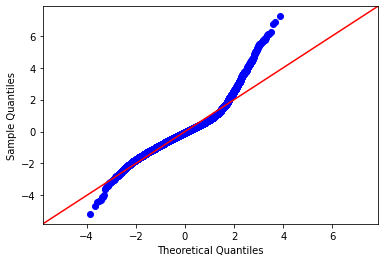

In [28]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

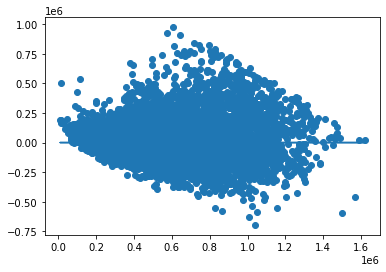

In [31]:
plt.scatter(model_2.predict(X_int), model_2.resid)
plt.plot(model_2.predict(X_int), [0 for i in range(len(X_int))])

It looks like the normality assumption is violated at the outliers of the data. It also looks like homoscedasticity is also being violated in the scatter of the residuals. Let's further remove outliers and see if it helps our data at all.

<AxesSubplot:>

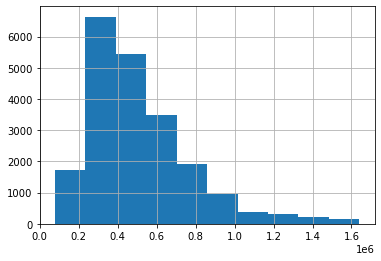

In [68]:
data.price.hist()

In [69]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.price.quantile(q=q)))

0.8 percentile: 685000.0
0.81 percentile: 699000.0
0.82 percentile: 710000.0
0.83 percentile: 725000.0
0.84 percentile: 739000.0
0.85 percentile: 750000.0
0.86 percentile: 769997.0
0.87 percentile: 785000.0
0.88 percentile: 800000.0
0.89 percentile: 824000.0
0.9 percentile: 845000.0
0.91 percentile: 865000.0
0.92 percentile: 895940.0
0.93 percentile: 925000.0
0.94 percentile: 962479.9999999988
0.95 percentile: 1000000.0
0.96 percentile: 1080000.0
0.97 percentile: 1180000.0
0.98 percentile: 1280000.0
0.99 percentile: 1400000.0


In [45]:
orig_tot = len(data)
data = data[data.price < 1300000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data))/orig_tot)
data.price = data.price.map(np.log) # Applying a log transformation

# Refit model with subset features
X = data[new_x_cols]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
X_int = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_int).fit()
model_3.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1271.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:03:12   Log-Likelihood:                 59115.
No. Observations:               16760   AIC:                        -1.181e+05
Df Residuals:                   16720   BIC:                        -1.178e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8131      0.024    -34.391      0.000      -0.859      -0.767
sqft_lot              1.776e-08   2.17e-09      8.166      0.000    1.35e-08     2.2e-08
sqft_above            4.535e-06   1.55e-07     29.233      0.000    4.23e-06    4.84e-06
sqft_basement          3.83e-06   1.75e-07     21.878      0.000    3.49e-06    4.17e-06
yr_built             -7.476e-05   3.34e-06    -22.350      0.000   -8.13e-05   -6.82e-05
yr_renovated          1.029e-06   1.65e-07      6.241      0.000    7.06e-07    1.35e-06
lat                      0.0395      0.000     89.308      0.000       0.039       0.040
sqft_living15          3.65e-06    1.5e-07     24.260      0.000    3.36e-06    3.95e-06
sqft_lot15           -3.101e-09   3.05e-09     -1.016      0.310   -9.08e-09    2.88e-09
bedro_2                  0.0005      0.000      2.513      0.012       0.000       0.001
bedro_7                 -0.0038      0.001     -2.763      0.006      -0.006      -0.001
bathr_1_to_2             0.0024      0.000     12.531      0.000       0.002       0.003
bathr_2_to_3             0.0035      0.000     14.326      0.000       0.003       0.004
bathr_3_to_4             0.0046      0.000     12.527      0.000       0.004       0.005
bathr_4_to_5             0.0031      0.001      3.948      0.000       0.002       0.005
bathr_6_plus            -0.0020      0.004     -0.484      0.628      -0.010       0.006
floor_15                 0.0012      0.000      5.449      0.000       0.001       0.002
floor_20                 0.0009      0.000      4.831      0.000       0.001       0.001
floor_25                 0.0030      0.001      4.145      0.000       0.002       0.004
floor_30                 0.0008      0.000      1.871      0.061    -3.6e-05       0.002
water_10                 0.0123      0.001     11.277      0.000       0.010       0.014
view_10                  0.0045      0.000      9.660      0.000       0.004       0.005
view_20                  0.0036      0.000     12.716      0.000       0.003       0.004
view_30                  0.0048      0.000     11.717      0.000       0.004       0.006
view_40                  0.0062      0.001      9.542      0.000       0.005       0.007
condi_3                  0.0052      0.001      8.788      0.000       0.004       0.006
condi_4                  0.0071      0.001     11.979      0.000       0.006       0.008
condi_5                  0.0090      0.001     14.526      0.000       0.008       0.010
grade_4                 -0.0221      0.007     -3.018      0.003      -0.036      -0.008
grade_5                 -0.0161      0.007     -2.257      0.024      -0.030      -0.002
grade_6                 -0.0116      0.007     -1.630      0.103      -0.026       0.002
grade_7                 -0.0062      0.007     -0.876    

By log transforming our dependent variable, this increased our R2 to .748.

<AxesSubplot:>

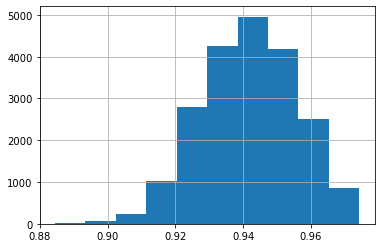

In [61]:
data.price.hist()

In [62]:
for i in range(0,20):
    q = i/100
    print("{} percentile: {}".format(q, data.price.quantile(q=q)))

0.0 percentile: 0.8844503653086496
0.01 percentile: 0.9081548343387724
0.02 percentile: 0.9126575622417962
0.03 percentile: 0.9153792985144824
0.04 percentile: 0.9170844894851363
0.05 percentile: 0.918657058824239
0.06 percentile: 0.9199090762252907
0.07 percentile: 0.9208948646809424
0.08 percentile: 0.9216740573414295
0.09 percentile: 0.9228384436053173
0.1 percentile: 0.92363295282814
0.11 percentile: 0.9242786815501971
0.12 percentile: 0.9247850056194804
0.13 percentile: 0.9255219839103096
0.14 percentile: 0.9261329187328965
0.15 percentile: 0.9267193215323772
0.16 percentile: 0.9273053801074514
0.17 percentile: 0.9277611583864931
0.18 percentile: 0.928320775207738
0.19 percentile: 0.9289541503636708


In [63]:
orig_tot = len(data)
data = data[data.price > 0.9] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data))/orig_tot)

# Refit model with subset features
X = data[new_x_cols]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
X_int = sm.add_constant(X_train)
model_4 = sm.OLS(y_train, X_int).fit()
model_4.summary()

Percent removed: 0.003197938045916663


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1248.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:13:44   Log-Likelihood:                 59194.
No. Observations:               16707   AIC:                        -1.183e+05
Df Residuals:                   16667   BIC:                        -1.180e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7804      0.023    -33.461      0.000      -0.826      -0.735
sqft_lot              1.748e-08   1.91e-09      9.170      0.000    1.37e-08    2.12e-08
sqft_above            4.367e-06   1.53e-07     28.573      0.000    4.07e-06    4.67e-06
sqft_basement         3.781e-06   1.73e-07     21.828      0.000    3.44e-06    4.12e-06
yr_built             -7.666e-05    3.3e-06    -23.230      0.000   -8.31e-05   -7.02e-05
yr_renovated          1.108e-06   1.63e-07      6.796      0.000    7.88e-07    1.43e-06
lat                      0.0389      0.000     89.184      0.000       0.038       0.040
sqft_living15         3.793e-06   1.48e-07     25.606      0.000     3.5e-06    4.08e-06
sqft_lot15           -4.528e-09   2.94e-09     -1.541      0.123   -1.03e-08    1.23e-09
bedro_2                  0.0008      0.000      4.505      0.000       0.000       0.001
bedro_7                 -0.0025      0.001     -1.734      0.083      -0.005       0.000
bathr_1_to_2             0.0023      0.000     12.314      0.000       0.002       0.003
bathr_2_to_3             0.0035      0.000     14.462      0.000       0.003       0.004
bathr_3_to_4             0.0049      0.000     13.473      0.000       0.004       0.006
bathr_4_to_5             0.0031      0.001      3.835      0.000       0.002       0.005
bathr_6_plus            -0.0058      0.005     -1.151      0.250      -0.016       0.004
floor_15                 0.0013      0.000      6.013      0.000       0.001       0.002
floor_20                 0.0008      0.000      4.049      0.000       0.000       0.001
floor_25                 0.0034      0.001      4.634      0.000       0.002       0.005
floor_30                 0.0009      0.000      2.281      0.023       0.000       0.002
water_10                 0.0124      0.001     11.757      0.000       0.010       0.014
view_10                  0.0047      0.000     10.192      0.000       0.004       0.006
view_20                  0.0036      0.000     12.965      0.000       0.003       0.004
view_30                  0.0051      0.000     12.607      0.000       0.004       0.006
view_40                  0.0054      0.001      8.316      0.000       0.004       0.007
condi_3                  0.0035      0.001      6.058      0.000       0.002       0.005
condi_4                  0.0054      0.001      9.202      0.000       0.004       0.006
condi_5                  0.0072      0.001     11.866      0.000       0.006       0.008
grade_4                 -0.0149      0.007     -2.064      0.039      -0.029      -0.001
grade_5                 -0.0138      0.007     -1.962      0.050      -0.028   -1.61e-05
grade_6                 -0.0109      0.007     -1.556      0.120      -0.025       0.003
grade_7                 -0.0059      0.007     -0.844    

In [72]:


summary = model_4.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)

p_table.columns = p_table.iloc[0]

p_table.drop(0, inplace=True)

p_table.set_index(p_table.columns[0], inplace=True)

p_table['P>|t|'] = p_table['P>|t|'].astype(float)

new_x_cols = list(p_table[p_table['P>|t|']<0.05].index)

new_x_cols

['const',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'sqft_living15',
 'bedro_2',
 'bathr_1_to_2',
 'bathr_2_to_3',
 'bathr_3_to_4',
 'bathr_4_to_5',
 'floor_15',
 'floor_20',
 'floor_25',
 'floor_30',
 'water_10',
 'view_10',
 'view_20',
 'view_30',
 'view_40',
 'condi_3',
 'condi_4',
 'condi_5',
 'grade_4',
 'zipco_98051_to_98100',
 'zipco_98101_to_98150',
 'zipco_98150_to_98200']

In [73]:
new_x_cols.remove('const')

In [74]:
print(len(X.columns), len(new_x_cols))

29 28


In [75]:
X = data[new_x_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1430.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:27:30   Log-Likelihood:                 58007.
No. Observations:               16707   AIC:                        -1.160e+05
Df Residuals:                   16678   BIC:                        -1.157e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9924      0.024    -42.081      0.000      -1.039      -0.946
sqft_lot              1.498e-08   1.49e-09     10.085      0.000    1.21e-08    1.79e-08
sqft_above            6.524e-06   1.51e-07     43.105      0.000    6.23e-06    6.82e-06
sqft_basement         4.787e-06   1.84e-07     26.040      0.000    4.43e-06    5.15e-06
yr_built             -4.227e-05   3.45e-06    -12.256      0.000    -4.9e-05   -3.55e-05
yr_renovated          1.481e-06   1.75e-07      8.480      0.000    1.14e-06    1.82e-06
lat                      0.0417      0.000     89.733      0.000       0.041       0.043
sqft_living15         5.757e-06   1.51e-07     38.179      0.000    5.46e-06    6.05e-06
bedro_2                  0.0010      0.000      5.088      0.000       0.001       0.001
bathr_1_to_2             0.0035      0.000     17.844      0.000       0.003       0.004
bathr_2_to_3             0.0052      0.000     20.695      0.000       0.005       0.006
bathr_3_to_4             0.0066      0.000     17.192      0.000       0.006       0.007
bathr_4_to_5             0.0031      0.001      3.668      0.000       0.001       0.005
floor_15                 0.0013      0.000      5.642      0.000       0.001       0.002
floor_20                 0.0012      0.000      5.872      0.000       0.001       0.002
floor_25                 0.0048      0.001      6.066      0.000       0.003       0.006
floor_30                 0.0026      0.000      6.020      0.000       0.002       0.003
water_10                 0.0119      0.001     10.529      0.000       0.010       0.014
view_10                  0.0052      0.000     10.503      0.000       0.004       0.006
view_20                  0.0045      0.000     14.993      0.000       0.004       0.005
view_30                  0.0062      0.000     14.434      0.000       0.005       0.007
view_40                  0.0065      0.001      9.396      0.000       0.005       0.008
condi_3                  0.0047      0.001      7.649      0.000       0.004       0.006
condi_4                  0.0068      0.001     10.857      0.000       0.006       0.008
condi_5                  0.0084      0.001     13.016      0.000       0.007       0.010
grade_4                 -0.0053      0.002     -3.043      0.002      -0.009      -0.002
zipco_98051_to_98100    -0.0012      0.000     -7.546      0.000      -0.002      -0.001
zipco_98101_to_98150     0.0039      0.000     20.633      0.000       0.004       0.004
zipco_98150_to_98200    -0.0033      0.000    -14.887      0.000      -0.004      -0.003
==============================================================================
Omnibus:                      249.960   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.39

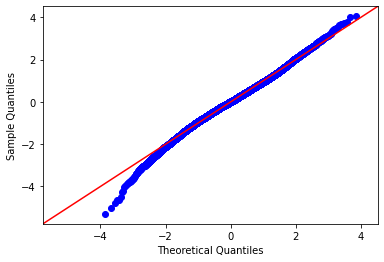

In [76]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

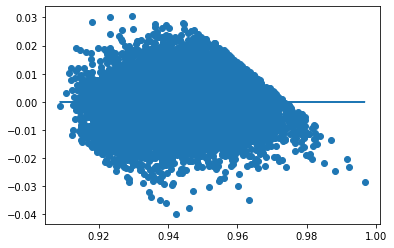

In [77]:
plt.scatter(model_5.predict(X_int), model_5.resid)
plt.plot(model_5.predict(X_int), [0 for i in range(len(X_int))])

further remove p-values **

test assumptions again **

### Investigate multicollinearity

In [78]:
X = data[new_x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(new_x_cols, vif))

[('sqft_lot', 1.2241689359674617),
 ('sqft_above', 24.24279565058057),
 ('sqft_basement', 2.4604025811694883),
 ('yr_built', 11844.512276305712),
 ('yr_renovated', 1.143805228269801),
 ('lat', 11843.504405132811),
 ('sqft_living15', 27.840514853063873),
 ('bedro_2', 1.497689093419075),
 ('bathr_1_to_2', 3.4097702144630135),
 ('bathr_2_to_3', 7.9155854087063195),
 ('bathr_3_to_4', 2.714042153275322),
 ('bathr_4_to_5', 1.2276819751688293),
 ('floor_15', 1.4267466029456146),
 ('floor_20', 4.335818161565248),
 ('floor_25', 1.0606458291009986),
 ('floor_30', 1.4523403788949316),
 ('water_10', 1.3070134632798556),
 ('view_10', 1.041185603921997),
 ('view_20', 1.1065065900669564),
 ('view_30', 1.0769865531440788),
 ('view_40', 1.3402904408136989),
 ('condi_3', 76.87645934497779),
 ('condi_4', 31.520149648746052),
 ('condi_5', 9.97545078467398),
 ('grade_4', 1.0108499645734441),
 ('zipco_98051_to_98100', 1.6758879842603804),
 ('zipco_98101_to_98150', 3.2491197928452187),
 ('zipco_98150_to_9820

In [81]:
vif_scores = list(zip(new_x_cols, vif))
x_cols_3 = [x for x,vif in vif_scores if vif < 25]
print(len(vif_scores), len(x_cols_3))

28 23


In [82]:
X = data[x_cols_3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_int = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_int).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     742.1
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:29:03   Log-Likelihood:                 53626.
No. Observations:               16707   AIC:                        -1.072e+05
Df Residuals:                   16683   BIC:                        -1.070e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9127      0.000   2891.590      0.000       0.912       0.913
sqft_lot              7.575e-09   2.05e-09      3.699      0.000    3.56e-09    1.16e-08
sqft_above            1.096e-05   1.62e-07     67.821      0.000    1.06e-05    1.13e-05
sqft_basement         8.415e-06   2.27e-07     37.089      0.000    7.97e-06    8.86e-06
yr_renovated          1.505e-06   2.14e-07      7.022      0.000    1.08e-06    1.92e-06
bedro_2                  0.0019      0.000      7.485      0.000       0.001       0.002
bathr_1_to_2             0.0035      0.000     14.021      0.000       0.003       0.004
bathr_2_to_3             0.0052      0.000     16.765      0.000       0.005       0.006
bathr_3_to_4             0.0062      0.000     13.007      0.000       0.005       0.007
bathr_4_to_5             0.0018      0.001      1.576      0.115      -0.000       0.004
floor_15                 0.0018      0.000      6.041      0.000       0.001       0.002
floor_20                -0.0009      0.000     -3.709      0.000      -0.001      -0.000
floor_25                 0.0023      0.001      2.254      0.024       0.000       0.004
floor_30                 0.0005      0.001      0.997      0.319      -0.000       0.002
water_10                 0.0075      0.001      5.010      0.000       0.005       0.010
view_10                  0.0067      0.001     10.210      0.000       0.005       0.008
view_20                  0.0048      0.000     12.620      0.000       0.004       0.006
view_30                  0.0059      0.001     10.680      0.000       0.005       0.007
view_40                  0.0079      0.001      8.781      0.000       0.006       0.010
condi_5                  0.0033      0.000     11.493      0.000       0.003       0.004
grade_4                 -0.0059      0.002     -2.698      0.007      -0.010      -0.002
zipco_98051_to_98100     0.0016      0.000      7.509      0.000       0.001       0.002
zipco_98101_to_98150     0.0089      0.000     41.561      0.000       0.008       0.009
zipco_98150_to_98200    -0.0005      0.000     -1.820      0.069      -0.001    3.91e-05
==============================================================================
Omnibus:                        3.203   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.227
Skew:                          -0.031   Prob(JB):                        0.199
Kurtosis:                       2.971   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity o

In [67]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_pairs=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_pairs.drop_duplicates(inplace=True)

In [68]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(condi_3, condi_4)",0.816021


This is a decent model with R-squared of 0.721. However, it looks like many of our predictors have a p-value greater than 0.05. Let's use a stepwise selection to start with an empty model, and only adds variables with an estimated p-value less than 0.05.

In [69]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [70]:
result = stepwise_selection(X, y, verbose=True)
print('resulting features:')
print(result)

<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  floor_20                       with p-value 0.0


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_above                     with p-value 0.0


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  zipco_98101_to_98150           with p-value 0.0


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_living15                  with p-value 0.0


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_basement                  with p-value 0.0


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  condi_5                        with p-value 1.19227e-47
Drop floor_20                       with p-value 0.151635


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  water_10                       with p-value 3.06567e-40


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  condi_4                        with p-value 3.93172e-35


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  yr_renovated                   with p-value 5.70476e-32


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  floor_30                       with p-value 8.04333e-23


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  view_20                        with p-value 1.85909e-14


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathr_2_to_3                   with p-value 3.72877e-12


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathr_1_to_2                   with p-value 1.33017e-17


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathr_3_to_4                   with p-value 2.1845e-36


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  floor_15                       with p-value 1.30314e-14


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bedro_2                        with p-value 1.26589e-16


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  view_30                        with p-value 6.66922e-11


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  view_10                        with p-value 2.5211e-11


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  view_40                        with p-value 3.55182e-10


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  floor_25                       with p-value 3.85703e-07


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  zipco_98051_to_98100           with p-value 1.37966e-06


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_lot                       with p-value 1.72197e-05


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  zipco_98150_to_98200           with p-value 7.71157e-05


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  grade_4                        with p-value 0.00146777


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  sqft_lot15                     with p-value 0.00431138


<ipython-input-69-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['sqft_above', 'zipco_98101_to_98150', 'sqft_living15', 'sqft_basement', 'condi_5', 'water_10', 'condi_4', 'yr_renovated', 'floor_30', 'view_20', 'bathr_2_to_3', 'bathr_1_to_2', 'bathr_3_to_4', 'floor_15', 'bedro_2', 'view_30', 'view_10', 'view_40', 'floor_25', 'zipco_98051_to_98100', 'sqft_lot', 'zipco_98150_to_98200', 'grade_4', 'sqft_lot15']


In [71]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1089.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:15:58   Log-Likelihood:                 68185.
No. Observations:               20884   AIC:                        -1.363e+05
Df Residuals:                   20859   BIC:                        -1.361e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9048      0.000   2908.158      0.000       0.904       0.905
sqft_above             6.76e-06   1.52e-07     44.509      0.000    6.46e-06    7.06e-06
zipco_98101_to_98150     0.0105      0.000     57.440      0.000       0.010       0.011
sqft_living15          7.69e-06   1.64e-07     46.961      0.000    7.37e-06    8.01e-06
sqft_basement         5.849e-06   1.86e-07     31.467      0.000    5.49e-06    6.21e-06
condi_5                  0.0045      0.000     17.716      0.000       0.004       0.005
water_10                 0.0093      0.001      7.352      0.000       0.007       0.012
condi_4                  0.0023      0.000     14.726      0.000       0.002       0.003
yr_renovated          2.104e-06   1.85e-07     11.376      0.000    1.74e-06    2.47e-06
floor_30                 0.0029      0.000      7.064      0.000       0.002       0.004
view_20                  0.0029      0.000      8.830      0.000       0.002       0.004
bathr_2_to_3             0.0042      0.000     18.943      0.000       0.004       0.005
bathr_1_to_2             0.0031      0.000     15.414      0.000       0.003       0.003
bathr_3_to_4             0.0053      0.000     14.409      0.000       0.005       0.006
floor_15                 0.0020      0.000      8.477      0.000       0.002       0.002
bedro_2                  0.0016      0.000      7.505      0.000       0.001       0.002
view_30                  0.0033      0.000      6.959      0.000       0.002       0.004
view_10                  0.0038      0.001      7.005      0.000       0.003       0.005
view_40                  0.0048      0.001      6.261      0.000       0.003       0.006
floor_25                 0.0043      0.001      5.207      0.000       0.003       0.006
zipco_98051_to_98100     0.0010      0.000      5.615      0.000       0.001       0.001
sqft_lot              1.216e-08   2.29e-09      5.317      0.000    7.68e-09    1.66e-08
zipco_98150_to_98200     0.0009      0.000      3.788      0.000       0.000       0.001
grade_4                 -0.0063      0.002     -3.176      0.001      -0.010      -0.002
sqft_lot15           -9.942e-09   3.48e-09     -2.855      0.004   -1.68e-08   -3.12e-09
==============================================================================
Omnibus:                        7.168   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.192
Skew:                          -0.044   Prob(JB):                       0.0274
Kurtosis:                       2.979   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition

We dropped the 10 variables from our model with p-values greater than 0.05. However, our R-squared stayed the same.

We still have 35 features in our model using stepwise selection. Let's try creating a simpler model using feature ranking. We will create a model with 15 features for this case.

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False])

In [55]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [56]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [57]:
yhat = linreg.predict(X[selected_columns])

In [58]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [59]:
r_squared

0.3349309635044785

In [60]:
adjusted_r_squared

0.3344544392366289

In this case, we created a simpler model with only 15 features, but loss some accuracy with an r-sqaured value of 0.67.

# Evaluation

The next step is to evaluate our models' ability to predict outcomes. We will do this by performing a train-test split.

In [37]:
# perform a train test split with a 30% test size.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [40]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 27392345410.38825
Test Mean Squared Error: 27626057137.576557


In [41]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 27392345410.38825
Test Mean Squared Error: 27626057137.576557
